# Chapter 5: Probability

**Mathematics for Machine Learning (2025)**
Teaching Team

Lecturers: 
- Eleonora Giunchiglia (Department of Electrical and Electronic Engineering)
- Felipe Tobar (Department of Mathematics)

Graduate Teaching Assistants (GTAs)
- Camilo Carvajal Reyes (Department of Mathematics)
- Joshua Ong (Department of Electrical and Electronic Engineering)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams.update({
    "font.size": 15,
    "axes.labelsize": 15,
    "axes.titlesize": 18,
    "xtick.labelsize": 15,
    "ytick.labelsize": 15,
    "legend.fontsize": 15,
    "font.family": "serif",
})

# Continuous random variables

### 1. PDF and CDF

Let us look at the example of 1-dimensional Gaussian distribution

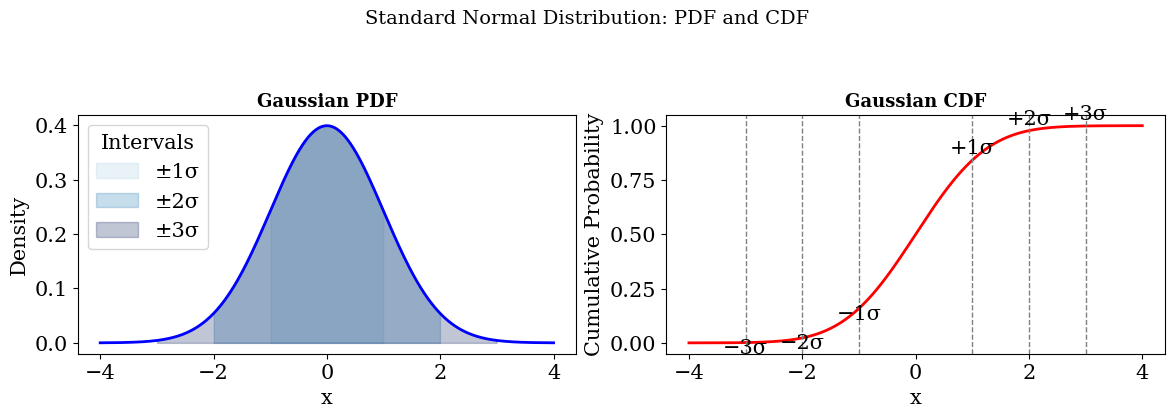

In [2]:
from scipy.stats import norm

# Parameters for standard normal
mu, sigma = 0, 1
x = np.linspace(-4, 4, 400)
pdf = norm.pdf(x, mu, sigma)
cdf = norm.cdf(x, mu, sigma)

# Probability mass in intervals
p1 = norm.cdf(1) - norm.cdf(-1)
p2 = norm.cdf(2) - norm.cdf(-2)
p3 = norm.cdf(3) - norm.cdf(-3)

# --- Plot PDF and CDF side by side ---
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# PDF
ax[0].plot(x, pdf, 'b-', lw=2)
ax[0].set_title("Gaussian PDF", fontsize=13, fontweight='bold')
ax[0].set_xlabel("x")
ax[0].set_ylabel("Density")

# Highlight 1σ, 2σ, 3σ regions
colors = ['#a6cee3', '#1f78b4', '#081d58']
for i, (a, b, c) in enumerate([(-1, 1, colors[0]), (-2, 2, colors[1]), (-3, 3, colors[2])], start=1):
    ax[0].fill_between(x, 0, pdf, where=(x >= a) & (x <= b), color=c, alpha=0.25, label=f'±{i}σ')

ax[0].legend(title="Intervals", loc='upper left')
ax[0].grid(False)

# CDF
ax[1].plot(x, cdf, 'r-', lw=2)
ax[1].set_title("Gaussian CDF", fontsize=13, fontweight='bold')
ax[1].set_xlabel("x")
ax[1].set_ylabel("Cumulative Probability")
ax[1].grid(False)

# Annotate 1σ, 2σ, 3σ positions
for i in [1, 2, 3]:
    ax[1].axvline(i, color='gray', ls='--', lw=1)
    ax[1].axvline(-i, color='gray', ls='--', lw=1)
    ax[1].text(i, norm.cdf(i)+0.03, f"+{i}σ", ha='center')
    ax[1].text(-i, norm.cdf(-i)-0.05, f"−{i}σ", ha='center')

plt.suptitle("Standard Normal Distribution: PDF and CDF", fontsize=14, y=1.05)
plt.tight_layout()
plt.savefig("../img/probability_gaussian_pdf_cdf.pdf");

### Example: Bernoulli for logistic regression

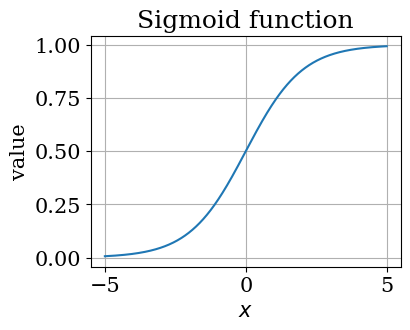

In [3]:
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

plt.rcParams['figure.figsize'] = (4, 3)
x_vals = np.linspace(-5,5,1000)
plt.plot(x_vals, sigmoid(x_vals))
plt.title("Sigmoid function")
plt.xlabel(r"$x$")
plt.ylabel('value')
plt.grid(True)
plt.savefig("../img/probability_sigmoid.pdf");

# Transforming random variables

### Example: $\xi^2$

/tmp/ipykernel_38157/3121873391.py:10: RuntimeWarning: divide by zero encountered in power
  return coef * z**(k/2 - 1) * np.exp(-z/2)


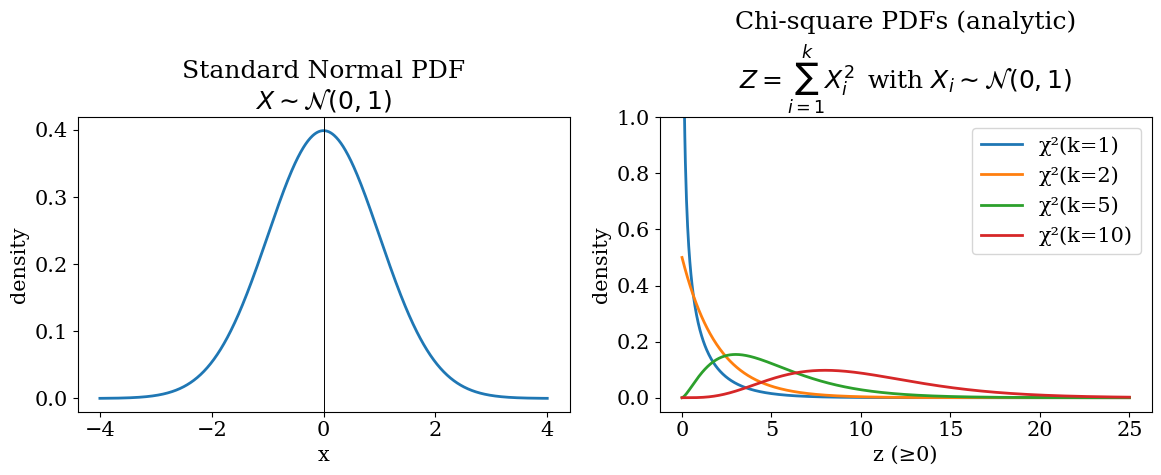

In [4]:
from scipy.special import gamma

# PDFs
def normal_pdf(x, mu=0.0, sigma=1.0):
    return (1.0 / (np.sqrt(2*np.pi) * sigma)) * np.exp(-0.5 * ((x-mu)/sigma)**2)

def chi2_pdf(z, k):
    # z > 0
    coef = 1.0 / (2**(k/2) * gamma(k/2))
    return coef * z**(k/2 - 1) * np.exp(-z/2)

# Domains
x = np.linspace(-4, 4, 801)
z = np.linspace(0, 25, 801)

# Compute PDFs
norm_vals = normal_pdf(x)
chi_k = [1, 2, 5, 10]
chi_vals = {k: chi2_pdf(z, k) for k in chi_k}

# Plot: Normal PDF and Chi-square PDFs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(x, norm_vals, lw=2)
ax1.set_title("Standard Normal PDF\n$X\\sim\\mathcal{N}(0,1)$")
ax1.set_xlabel("x")
ax1.set_ylabel("density")
ax1.axvline(0, color='k', lw=0.7)
ax1.grid(False)

for k, vals in chi_vals.items():
    ax2.plot(z, vals, lw=2, label=f"χ²(k={k})")
ax2.set_title("Chi-square PDFs (analytic)\n$Z=\\sum_{i=1}^k X_i^2\\,$ with $X_i\\sim\\mathcal{N}(0,1)$")
ax2.set_xlabel("z (≥0)")
ax2.set_ylabel("density")
ax2.legend()
ax2.set_ylim([-0.05,1])
ax2.grid(False)

plt.tight_layout()
plt.savefig("../img/probability_xi-squared.pdf");

### Example: Box Muller for simulating Gaussian distributions

Let $U,V\sim\mathcal{U}([0,1])$, we define:
$$R:=\displaystyle\sqrt{-2 \ln U}\, ,$$ y $$ \hat{\theta}:=(cos(2\pi V),sen(2\pi V)) \, .$$
It can be shown that
$$ X=(X_1,X_2):=R\hat{\theta}\sim\mathcal{N}(0,I_2) \, .$$
That is, $X_1 \perp\!\!\!\perp X_2$ y $X_1,X_2\sim\mathcal{N}(0,1)$.

> Exercises
>
> a) Find out how to simulate a uniform random variable using python (there is more than one way). Obtain samples for increasing N (number of samples) and plot.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

U = np.random.uniform(0,1,size=10000)

plt.hist(U);

> b) Implement the Box Müller method. Use it to compute Gaussian samples and plot.

In [ ]:
V = np.random.uniform(0,1,size=1000)

R = np.sqrt(-2*np.log(U))
theta1 = np.cos(2*np.pi*V)
theta2 = np.sin(2*np.pi*V)

plt.scatter(theta1*R,theta2*R);

> c) Using samples from part b), compute the Monte Carlo approximation of the mean and variance of the Gaussian distribution. Plot the estimation as $N$ increases along with the known value.

> d) Using the example above, compute samples for the $\xi^2$ random variable for different parameters $k$. Compare with the theoretical values.

> e) Why is it important to simulate random variables? Provide a real life example.

> f) Why is transforming samples and radom variables from one another important? Find out how computers "sample" (see, for instance, the Mersenne twister algorithm).

> g) Using the fact that the area of a circle of radius $r$ divided by the area of the square of sides $2r$ is equal to $\pi/4$, estimate the value of $\pi$ using a Monte Carlo approximation from uniform distributions.

Related video: [estimating pi with raindrops](https://www.youtube.com/watch?v=I-BC_vI4CAE)